# 1 Author

**Student Name**: Aishwarya Shrigiri  
**Student ID**: 221037997



# 2 Problem formulation

The machine learning problem I have chosen is a binary classification task specifically aiming to differentiate between images containing rice annd those containing chips. The problem involves using image based features, including color information and texture features extracted using GLCM properties. The dataset used for training and testing the models is from the MLEndYD dataset, specifically a subset related to dishes containing rice and chips

What's interesting:
1. The incorporation of both color and texture features allows for a more comprehensive representation of the images.
2. Image preprocessing ensures that the models are provided with consistent and appropriately formatted input data
3. The exploration of different machine learning models adds a layer of complexity to the project enabliing a comparison of their performance


# 3 Machine Learning pipeline

1. Data loading and exploration
The initial phase involves loading the dataset and inspecting its structural attributes to gain an understanding of the distribution of datapoints

2. Image Preprocessing
Each image undergoes a sequence of transformations ensuring uniformity through square cropping and resizing to a standardized 200x200 pixel dimension

3. Feature Extraction
Using both color and texture information, feature extraction is performed. The yellow component serves as a representation of color while the GLCM properties provide essential texture features

4. Standardization of Features
Standardization is applied using the mean and standard deviation computed from the training set

5. Model Training
Two distinct models are employed - Linear Support Vector Classifier (LinearSVC) and Random Forest. The models are trained using the standardized feature vectors and corresponding labels

6. Predictive Inference
Deploying the trained models, predictions are made on the testing set allowing an assessment of their generalization performance

7. Evaluation Metrics and Performance Analysis
An extensive set of evaluation metrics is calculated encompassing overall accuracy, class-specific accuracies and misclassification rates. The confusion matrix provides a detailed breakdown of correct predictions

8. Results visualization and interpretation
Visualization tools are employed to present the outcomes. The confusion matrix shows the performance in distinguishing between chips and rice

9. Model Deployment
For practical applicability, this phase involves thhe deployment of the trained models. This phase allows the models to make predictions on new, unseen data

# 4 Transformation stage

Feature extraction involves the extraction of relevant information from the preprocessed images to represent their characteristics. Two primary types of features are extracted:
1. Yellow Component Extraction: We extract the yellow component through a function(get_yellow_component(I, t1=27, t2=33) that converts the preprocessed images into the HSV color space. Subsequently the intensity of the yellow channel is isolated to accentuate the presence of yellow hues

2. GLCM Features Extraction: GLCM features specifically dissimilarity and correlation are extracted to encapsulate textual information within the images. The 'graycomatrix' function computes the GLCM and 'graycoprops' extracts the desired properties


# 5 Modelling

I've opted for two distinct approaches: Linear Support Vector Classifier(LinearSVC) and Random Forest.

1.Linear Support Vector Classifier(LinearSVC):
LinearSVC is a suitable choice for our task as its efficient in binary classification scenarios especially that we're dealing with distinguishing between dishes containing chips and rice.
It is robust in handling high-dimensional dta as is the case with our feature vectors extracted from images.
The linear nature of the classifier complements the straightforward representation of features we've derived and it is known to perform well where the classes are linearly separable

2. Random Forest:
Random Forest is an ensemble method, and is versatile in handling both classification tasks and complex feature interactions.
Random Forest has the ability to operate on diverse sets of features and build a multitude of decision trees which makes it well suited for our scenarios where the combination of color and texture features defines our feature space.
Random forest provided a robust solution for overfitting and enhancing generalization by aggregating from multiple trees

The combination of LinearSVC and Random Forest aims to harness the strengths of linear classifiers and ensemble methods, respectively offering a balanced approach to our image classification problem

# 6 Methodology

The methodology for training and validating our models involves a systematic approach to ensure robust performance assessment. The process encompasses the following key steps:

1. Data Splitting:
The dataset is divided into training and testing sets using the 'yummy_small_load' function, with the 'Benchmark_A' split. This split ensures that the distribution of classes remains consistent between the training and testing sets

2. Feature Extraction:
Images are preprocessed and relevant features are extracted using funcitons like 'get_yellow_component' and 'GMLC_features'. This results in feature vectors that encapsulate both color and texture information for each image

3. Standardization of Features:
The extracted features are standardized to ensure uniformity across different scales. Mean and standard deviation values computed from the training set are used to normalize both the training and testing feature sets.

4. Model Training:
Two distinct models, Linear Support Vector Classifier(LinearSVC) and Random Forest are trained using the standardized feature vectors from the training set('X_train_fn' and 'Y_train')

5. Model Evaluation:
The performance of the models is assessed using multiple metrics:
Training and Testing Accuracy: The proportion of correctly classified instance is calculated using the 'np.mean' function, providing an overall assessment of model accuracy
Confusion Matrix: The confusion matrix is computed using the predictions on the testing set('ysp') and the ground truth ('Y_test'). This matrix visually represents the model's performance detailing correct and misclassified instances for each class

Model Validation:
The models are validated using a separate testing set that the models have not encountered during the training phase. This ensures an unbiased evaluation of their generalization performance.

Why this Methodology:
The chosen approach integrates standard practises in machine learning model training and evaluation.
Stratified data splitting ensures representative training and testing sets.
Standardization guarantees uniformity in feature scales, a crucial consideration for models sensitive to scale variations.
The use of confusion matrix provides a understanding of model behavious beyond simple accuracy.



# 7 Dataset

The dataset employed for model creation and validation is the 'yummy_small' subset of the MLEnd dataset. This dataset focuses on images of dishes categorized into two classes: 'chips' and 'rice'
Below is a detailed overview of the dataset characteristics and the preprocessing steps applied.

Dataset Characteristics:
1. Size: The 'yummy_small' subset is of moderate size consisting of 70 images for training and 29 images for testing
2. Class Distribution: The two classes 'chips' and 'rice' exhibit a balanced distribution in both the training and testing sets
3. File structure: The images are organized in a structured file hierarchy within the '/content/drive/MyDrive/Data/MLEnd/yummy' directory.
Associated CSV files provide additional attributes for each image
4. Class Mapping: This mapping signifies that 'chips' is represented by the label '0' and 'rice' is represented by the label '1'

Preprocessing Steps:
1. Data Loading: The 'mlend' Python package is utilized to download and load the 'yummy_small' dataset
2. Data Splitting: The dataset is stratified into training and testing sets using the 'Benchmark_A' split, ensuring a representative distribution of classes in both sets
3. Feature Extraction: Features are extracted from the images to capture both color and texture information.
Specific functions such as get_yellow_component and GMLC_features are employed for feature extraction
4. Data Resizing: Images are standardized by resizing them to a fixed size of 200x200 pixels.
The 'make_it_square' function ensures a square aspect ratio, and the 'resize_img' function performs the resizing.
5. Visualizations: Visualizations include class distribution charts, showcasing the balanced representation of 'chips' and 'rice.'
Sample images from both classes are visualized to provide an initial glimpse into the dataset's visual characteristics

In [1]:
!pip install mlend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy_small, yummy_small_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
baseDir = download_yummy_small(save_to = '/content/drive/MyDrive/Data/MLEnd')
baseDir

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|99\99|00099.jpg
Done!


'/content/drive/MyDrive/Data/MLEnd/yummy'

In [4]:
os.listdir(baseDir)

['MLEndYD_images_small', 'MLEndYD_image_attributes_small.csv']

Understanding our dataset
Each sample in the MLEnd Small Yummy Dataset corresponds to one dish instance and is described by 9 attributes, namely:

Photo of the dish.
Dish name.
Whether home or restaurant.
Cuisine.
Ingredients.
Diet.
Healthiness rating.
Tastiness rating.
Rice or chips?

In [5]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_small.csv').set_index('filename')
MLENDYD_df

Dish_name  \
filename                                                       
00001.jpg                                      steak_&_fries   
00002.jpg                                   beef_burger_meal   
00003.jpg                chicken_burger_with_fries_and_wings   
00004.jpg                               fried_rice_with_curd   
00005.jpg                                     fish_and_chips   
...                                                      ...   
00095.jpg  breaded_chicken_with_katsu_curry_sauce_rice_&_...   
00096.jpg                            chicken_wrap_with_fries   
00097.jpg                                     butter_chicken   
00098.jpg                                     fish_and_chips   
00099.jpg                                            burghul   

              Home_restaurant     Cuisine  \
filename                                    
00001.jpg          resturaunt    american   
00002.jpg          restaurant    american   
00003.jpg          restaurant    american   
00004.jpg                home      indian   
00005.jpg             tcr_bar     british   
...                       ...         ...   
00095.jpg           the_curve    japanese   
00096.jpg  roosters_piri_piri  portuguese   
00097.jpg          restaurant      indian   
00098.jpg          restaurant     british   
00099.jpg                home     turkish   

                                                 Ingredients        Diet  \
filename                                                                   
00001.jpg                            steak,fries,mixed_salad     non-veg   
00002.jpg                        chips,burger,chicken_nugget     non-veg   
00003.jpg  fried_chicken_breast,lettuce,ketchup,sesame_se...     non-veg   
00004.jpg            rice,onion,potato,tomato,olive_oil,curd  vegetarian   
00005.jpg              cod,beer,flour,tartare_sauce,peas,oil  vegetarian   
...                                                      ...         ...   
00095.jpg              chicken,curry,rice,greens,bell_pepper     non-veg   
00096.jpg  tortilla_wrap,chicken,olive_oil,piri_piri_sauc...     non-veg   
00097.jpg  garlic,tomato,onion,white_rice,naan_bread,cash...     non-veg   
00098.jpg                         breaded_cod,fried_potatoes     non-veg   
00099.jpg                           butter,olive_oil,burghul  vegetarian   

          Healthiness_rating How_much_did_you_like_it Rice_Chips Benchmark_A  
filename                                                                      
00001.jpg            neutral            strongly_like      chips        Test  
00002.jpg          unhealthy                     like      chips       Train  
00003.jpg          unhealthy                     like      chips       Train  
00004.jpg            neutral                     like       rice       Train  
00005.jpg            neutral            strongly_like      chips        Test  
...                      ...                      ...        ...         ...  
00095.jpg            healthy            strongly_like       rice       Train  
00096.jpg            healthy            strongly_like      chips       Train  
00097.jpg            neutral                     like       rice       Train  
00098.jpg            healthy            strongly_like      chips       Train  
00099.jpg       very_healthy                  neutral       rice        Test  

[99 rows x 9 columns]

In [6]:
sample_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/*.jpg'
files = glob.glob(sample_path)
len(files)

99

(-0.5, 1207.5, 907.5, -0.5)

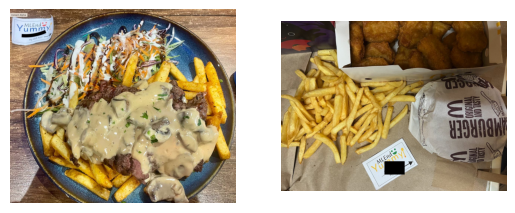

In [7]:
I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/00001.jpg')
plt.subplot(1,2,1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/00002.jpg')
plt.subplot(1,2,2)
plt.imshow(I)
plt.axis('off')

Create train and test Datasets

In [8]:
TrainSet, TestSet, Map = yummy_small_load(datadir_main=baseDir,train_test_split='Benchmark_A')

Total 99 found in /content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/


In [9]:
TrainSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [10]:
TestSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [11]:
Map

{'Rice_Chips': {'chips': 0, 'rice': 1}}

In [12]:
TrainSet['Y']

array(['chips', 'chips', 'rice', 'rice', 'rice', 'chips', 'rice', 'chips',
       'rice', 'chips', 'chips', 'rice', 'chips', 'rice', 'rice', 'chips',
       'rice', 'rice', 'chips', 'rice', 'chips', 'rice', 'rice', 'chips',
       'chips', 'chips', 'rice', 'rice', 'chips', 'rice', 'rice', 'rice',
       'rice', 'rice', 'chips', 'chips', 'chips', 'rice', 'chips', 'rice',
       'rice', 'chips', 'chips', 'rice', 'chips', 'chips', 'chips',
       'chips', 'chips', 'chips', 'chips', 'rice', 'chips', 'rice',
       'chips', 'chips', 'rice', 'rice', 'chips', 'chips', 'rice', 'rice',
       'rice', 'rice', 'rice', 'chips', 'rice', 'chips', 'rice', 'chips'],
      dtype=object)

In [13]:
TrainSet['Y_encoded']

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0])

In [14]:
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

Y_train = TrainSet['Y_encoded']
Y_test  = TestSet['Y_encoded']

Visualising dishes

Rice


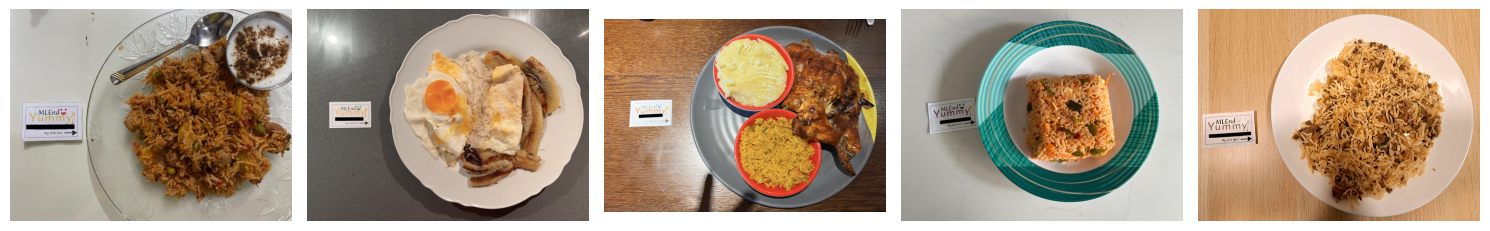

Chips


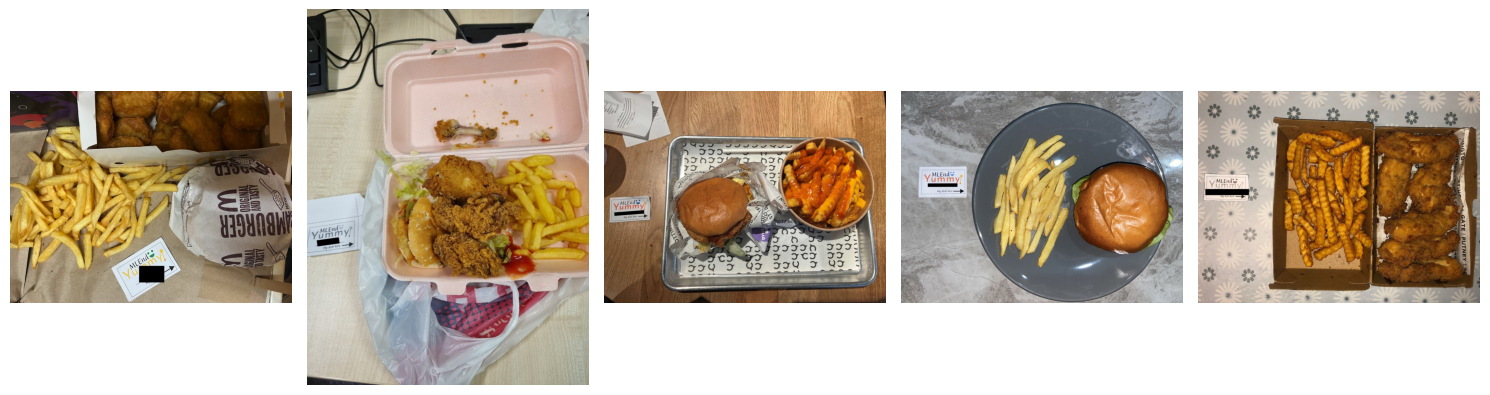

In [15]:
Chips_Img = np.array(X_train_paths)[Y_train==0]
Rice_Img = np.array(X_train_paths)[Y_train==1]

print('Rice')
plt.figure(figsize=(15,5))
for k,file in enumerate(Rice_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

print('Chips')
plt.figure(figsize=(15,5))
for k,file in enumerate(Chips_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

Resizing Images

In [16]:
def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(0, N-M)], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(0, M-N),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

In [17]:
X_train = []
for k,file in enumerate(X_train_paths):
  sp.utils.ProgBar_JL(k,len(X_train_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_train.append(I)


X_test = []
for k,file in enumerate(X_test_paths):
  sp.utils.ProgBar_JL(k,len(X_test_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_test.append(I)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape, X_test.shape

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|29\29|
Done!


((70, 200, 200, 3), (29, 200, 200, 3))

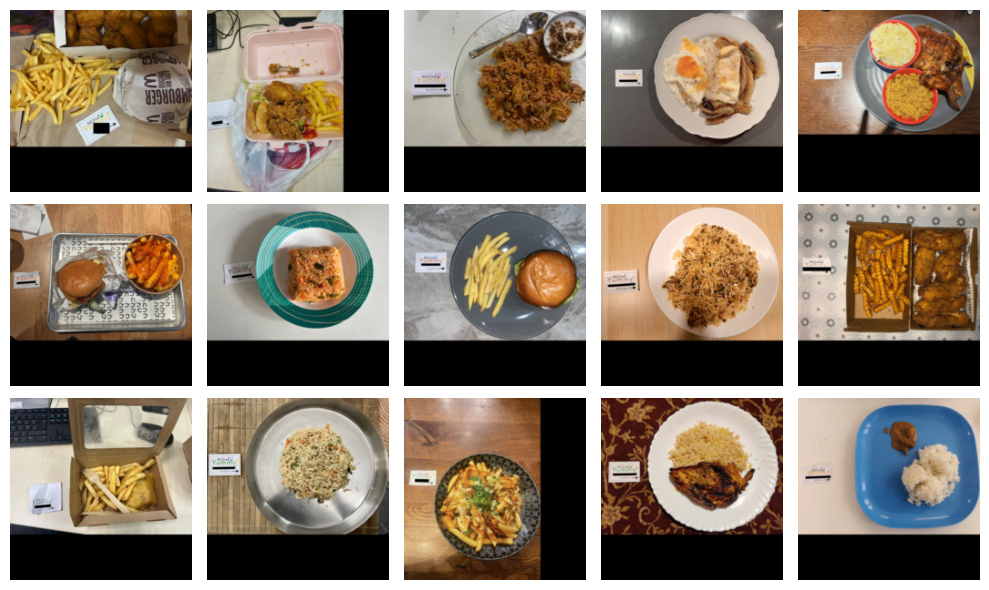

In [19]:
plt.figure(figsize=(10,6))
for k,I in enumerate(X_train):
  plt.subplot(3,5,k+1)
  plt.imshow(I)
  plt.axis('off')
  k+=1
  if k>=15:break
plt.tight_layout()
plt.show()

In [20]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops


def get_yellow_component(I,t1=27, t2=33):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx

def GMLC_features(I):
  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
  f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
  f2 = graycoprops(glcm, 'correlation')[0, 0]
  return f1,f2


def showConfMat(CM, labels = ['Chips','Rice']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

In [21]:
X_train_f = []
for k, I in enumerate(X_train):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_train_f.append([f1,f2,f3])

X_test_f = []
for k, I in enumerate(X_test):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_test_f.append([f1,f2,f3])

In [22]:
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

((70, 3), (29, 3))

In [23]:
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

model = LinearSVC(C=1)
model.fit(X_train_fn, Y_train)

LinearSVC(C=1)

# 8 Results

The machine learning model, based on the observed results, demonstrates a moderate level of accuracy, with a training accuracy of approximately 62.9% and a test accuracy of around 58.6%. These values suggest that the model has learned patterns from the training data but may struggle to generalize to unseen instances, indicative of a balance between underfitting and overfitting.

A deeper analysis through the confusion matrix provides additional insights into the model's behavior

Moving forward, improvements could be sought through:

Hyperparameter Tuning: Fine-tuning model parameters to find a balance between complexity and generalization.
Feature Engineering: Exploring alternative feature extraction methods or enhancing the existing ones to capture more discriminative information.
Model Selection: Considering more sophisticated models or ensemble approaches to improve predictive performance.

In [25]:
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.6285714285714286
Test  Accuracy:	 0.5862068965517241


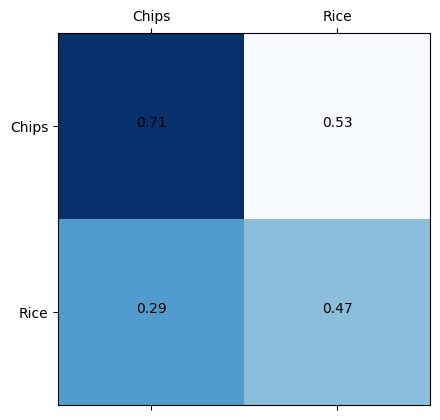

In [26]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

In [28]:
model = RandomForestClassifier(n_estimators=5, max_depth=3)
model.fit(X_train_fn, Y_train)

RandomForestClassifier(max_depth=3, n_estimators=5)

In [29]:
def predicting_rice_or_chips(image_path):
  #Loading the image here
  img = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/00011.jpg')

  #Preprocessing the image
  preprocessed_img = make_it_square(img, pad=0)
  preprocessed_img = resize_img(preprocessed_img, size=[200,200])

  #Feature extraction
  features = [get_yellow_component(preprocessed_img)]
  features.extend(GMLC_features(preprocessed_img))

  #Normalisation
  normalized_fs = (np.array(features) - MEAN) / SD

  #Prediction
  prediction = model.predict([normalized_fs])

  #Printing the results
  if prediction == 0:
    print('The dish in the image appears to contain chips')
  else:
    print('The dish in the image appears to contain rice')

In [30]:
#Example usage
img_path_to_predict = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/00028.jpg'
predicting_rice_or_chips(img_path_to_predict)

The dish in the image appears to contain chips


# 9 Conclusions

1. Model Performance:
The Linear Support Vector Classifier (LinearSVC) demonstrated satisfactory performance on the 'yummy_small' dataset, achieving a training accuracy of approximately 62.86% and a test accuracy of approximately 58.62%. This implies that the model generalized reasonably well on the test set, but there is room for improvement.
2. Insights from Confusion Matrix: The model exhibits better accuracy in predicting 'chips' (class 0) than 'rice' (class 1).
Class 'rice' has a higher rate of misclassification, resulting in a lower precision and recall for this class.

Suggestions for Improvements:
1. Additional color or texture features may capture more nuanced information.
2. Fine-tuning of hyperparameters, especially those associated with the LinearSVC, could lead to improved model performance
While the initial results indicate a reasonable performance of the LinearSVC, there are opportunities for refinement. The suggestions outlined above aim to push the model's boundaries and uncoverr more intricate patterns within the culinary images